In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
def peek(x, amp, mu, width):
    return amp*np.exp(-(x-mu)**2/np.log(16)/width**2)

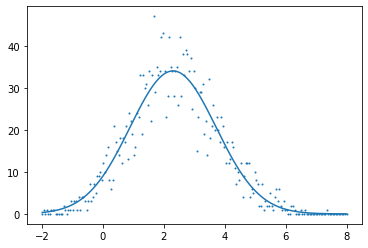

In [30]:
amp = 34
mu = 2.3
width = 1.2

X = np.linspace(-2,8,200)
f = peek(X, amp, mu, width)
Y = np.random.poisson(f)

lin = np.linspace(-2,8,1000)
plt.plot(lin, peek(lin, amp, mu, width))
plt.scatter(X, Y, s=1)

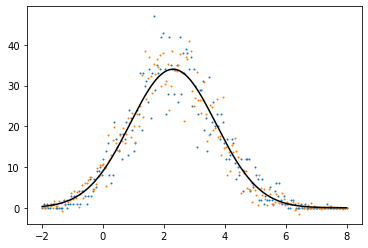

In [48]:
Y2 = np.array([np.random.normal(y,y**0.5) for y in f])
plt.plot(lin, peek(lin, amp, mu, width), color='k')
plt.scatter(X, Y, s=1)
plt.scatter(X, Y2, s=1)

In [87]:
f_lin = peek(lin, amp, mu, width)
d1 = np.array([[np.random.poisson(y) for _ in range(10**3)] for y in f_lin])
d2 = np.array([[np.random.normal(y, 3.51) for _ in range(10**3)] for y in f_lin])
d3 = np.array([[np.random.normal(y, y**0.5) for _ in range(10**3)] for y in f_lin])

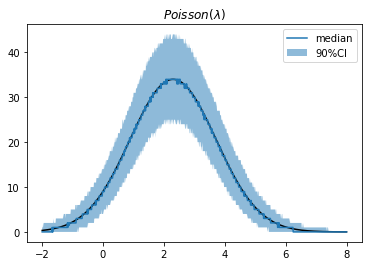

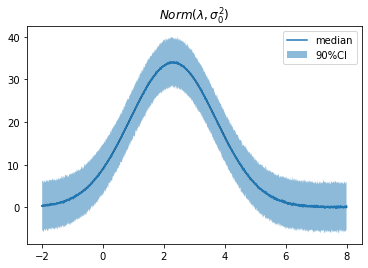

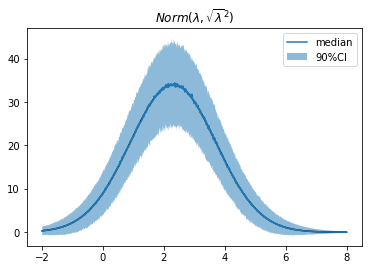

In [99]:
plt.plot(lin, peek(lin, amp, mu, width), color='k')
plt.plot(lin, np.percentile(d1, 50, axis=1), label='median')
plt.fill_between(lin, np.percentile(d1, 5, axis=1), np.percentile(d1, 95, axis=1), alpha=0.5, label='90%CI')
plt.title(r'${Poisson}(\lambda)$')
plt.legend()
plt.show()

plt.plot(lin, peek(lin, amp, mu, width), color='k')
plt.plot(lin, np.percentile(d2, 50, axis=1), label='median')
plt.fill_between(lin, np.percentile(d2, 5, axis=1), np.percentile(d2, 95, axis=1), alpha=0.5, label='90%CI')
plt.title(r'${Norm}(\lambda, \sigma_0^2)$')
plt.legend()
plt.show()

plt.plot(lin, peek(lin, amp, mu, width), color='k')
plt.plot(lin, np.percentile(d3, 50, axis=1), label='median')
plt.fill_between(lin, np.percentile(d3, 5, axis=1), np.percentile(d3, 95, axis=1), alpha=0.5, label='90%CI')
plt.title(r'${Norm}(\lambda, \sqrt{\lambda}^2)$')
plt.legend()
plt.show()

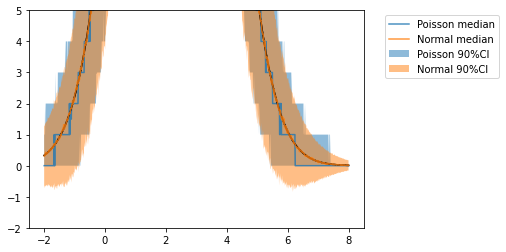

In [105]:
plt.plot(lin, peek(lin, amp, mu, width), color='k')
plt.plot(lin, np.percentile(d1, 50, axis=1), alpha=0.8, label='Poisson median')
plt.fill_between(lin, np.percentile(d1, 5, axis=1), np.percentile(d1, 95, axis=1), alpha=0.5, label='Poisson 90%CI')

plt.plot(lin, peek(lin, amp, mu, width), color='k')
plt.plot(lin, np.percentile(d3, 50, axis=1), alpha=0.8, label='Normal median')
plt.fill_between(lin, np.percentile(d3, 5, axis=1), np.percentile(d3, 95, axis=1), alpha=0.5, label='Normal 90%CI')

plt.ylim(-2,5)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", ncol=1)
plt.show()

(-5.0, 10.0)

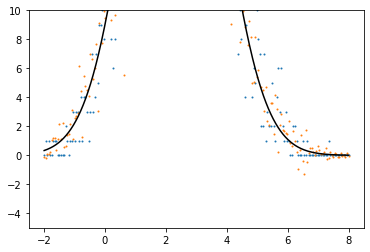

In [50]:
Y2 = np.array([np.random.normal(y,y**0.5) for y in f])
plt.plot(lin, peek(lin, amp, mu, width), color='k')
plt.scatter(X, Y, s=1)
plt.scatter(X, Y2, s=1)
plt.ylim(-5, 10)

In [20]:
(Y*np.diff(X).mean()).sum()

0.849321800288019

In [32]:
(Y*np.log(f)-f).sum()-sum(math.lgamma(y+1) for y in Y)

-420.9829216214084

In [34]:
(-(Y-f)**2/2-np.log(2*np.pi*1)/2).sum()

-1530.39449115333

In [41]:
(-((Y-f)/2/np.maximum(Y, 1))**2-np.log(2*np.pi*np.maximum(Y, 1)**2)/2).sum()

-546.1265610318039

In [42]:
(-((Y-f)/2/f)**2-np.log(2*np.pi*f**2)/2).sum()

-532.5002349956095

In [63]:
Z = [(-(Y-f)**2/2/sigma**2-np.log(2*np.pi*sigma**2)/2).sum() for sigma in [10**i for i in np.linspace(-2,2,100)]]

(1, 100)

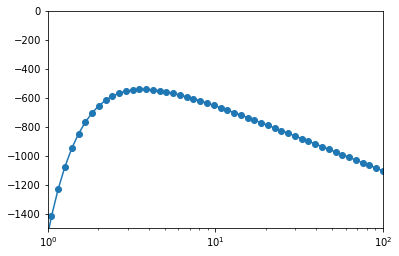

In [72]:
plt.plot([10**i for i in np.linspace(-2,2,100)], Z, marker='o')
plt.xscale('log')
plt.ylim(-1.5e3, 0)
plt.xlim(1, 100)

In [65]:
max(Z)

-544.2062356816873

In [68]:
[10**i for i in np.linspace(-2,2,100)][np.array(Z).argmax()]

3.5111917342151346

In [73]:
(Y*np.log(f)-f).sum()-sum(math.lgamma(y+1) for y in Y)-max(Z)

123.22331406027888

In [78]:
offset=5.5
g = peek(X, amp, mu, width)+offset
Y3 = np.random.poisson(g)
Y4 = np.array([np.random.normal(y,y**0.5) for y in g])

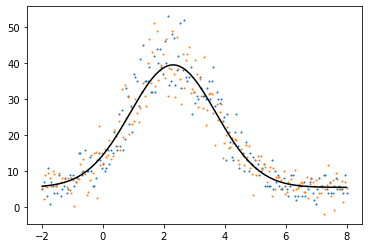

In [79]:
plt.plot(lin, peek(lin, amp, mu, width)+offset, color='k')
plt.scatter(X, Y3, s=1)
plt.scatter(X, Y4, s=1)

In [75]:
(Y3*np.log(g)-g).sum()-sum(math.lgamma(y+1) for y in Y3)

-544.7324311345037

In [76]:
(-((Y3-g)/2/g)**2-np.log(2*np.pi*g**2)/2).sum()

-709.7554552264467

(1, 100)

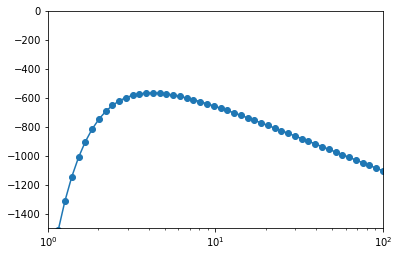

In [80]:
Z2 = [(-(Y3-g)**2/2/sigma**2-np.log(2*np.pi*sigma**2)/2).sum() for sigma in [10**i for i in np.linspace(-2,2,100)]]
plt.plot([10**i for i in np.linspace(-2,2,100)], Z2, marker='o')
plt.xscale('log')
plt.ylim(-1.5e3, 0)
plt.xlim(1, 100)

In [83]:
[10**i for i in np.linspace(-2,2,100)][np.array(Z2).argmax()]

4.229242874389499

In [84]:
Y5 = np.array([np.random.normal(y, 4.229) for y in g])

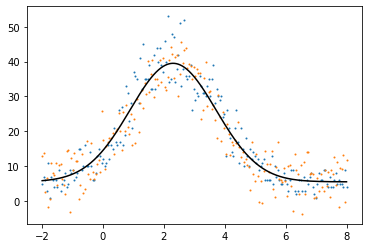

In [85]:
plt.plot(lin, peek(lin, amp, mu, width)+offset, color='k')
plt.scatter(X, Y3, s=1)
plt.scatter(X, Y5, s=1)